<a href="https://colab.research.google.com/github/Suthineett/Michelin-Star-Across-the-Globe/blob/main/Michelin_Star.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [270]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [271]:
# Import Data
raw = pd.read_excel('/content/michelin_star_restaurant.xls')

In [272]:
# Data Exploration
raw.info() # 3192 rows × 13 columns



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            3192 non-null   object 
 1   blurb           3192 non-null   object 
 2   michelin_award  3192 non-null   object 
 3   city            3192 non-null   object 
 4   country         3192 non-null   object 
 5   lat             3192 non-null   float64
 6   lon             3192 non-null   float64
 7   image           3174 non-null   object 
 8   chef            2805 non-null   object 
 9   cuisine1        3192 non-null   object 
 10  cuisine2        830 non-null    object 
 11  url             3192 non-null   object 
 12  url2            3085 non-null   object 
dtypes: float64(2), object(11)
memory usage: 324.3+ KB


In [273]:
raw.head() #Found outliers columns (image,url,url2) / michelin_award 


,name,blurb,michelin_award,city,country,lat,lon,image,chef,cuisine1,cuisine2,url,url2
0,'L Chimpl,Haute cuisine has arrived at the ‚Äúsimple‚Äù ...,ONE_STAR,Tamion,Italy,46.407342,11.656432,https://axwwgrkdco.cloudimg.io/v7/mitp-p-001-d...,Stefano Ghetta,Creative,Contemporary,https://guide.michelin.com/en/trentino-alto-ad...,https://guide.michelin.com/en/trentino-alto-ad...
1,'t Amsterdammertje,"If you‚Äôre a fan of hip, vibrant and trendy",ONE_STAR,Loenen aan de Vecht,Netherlands,52.209859,5.021655,https://axwwgrkdco.cloudimg.io/v7/mitp-p-001-d...,Andr√© Gerrits,Creative,NaN,https://guide.michelin.com/en/utrecht/loenen-a...,https://guide.michelin.com/en/utrecht/loenen-a...
2,'t Fornuis,‚Äôt Fornuis is a restaurant that has become rare,ONE_STAR,Antwerpen,Belgium,51.219039,4.399448,https://axwwgrkdco.cloudimg.io/v7/mitp-p-001-d...,Johan Segers,Classic Cuisine,NaN,https://guide.michelin.com/en/antwerpen/be-ant...,https://guide.michelin.com/en/antwerpen/be-ant...
3,'t Korennaer,Edwin Van Goethem jazzes up his cooking with i...,ONE_STAR,Nieuwkerken-Waas,Belgium,51.192947,4.178107,https://axwwgrkdco.cloudimg.io/v7/mitp-p-001-d...,Edwin Van Goethem,Modern Cuisine,NaN,https://guide.michelin.com/en/oost-vlaanderen/...,https://guide.michelin.com/en/oost-vlaanderen/...
4,'t Lansink,Warmth and character are the hallmarks of ‚Äôt...,ONE_STAR,Hengelo,Netherlands,52.259676,6.782364,https://axwwgrkdco.cloudimg.io/v7/mtp-cf-image...,Lars van Galen,Modern Cuisine,Modern French,https://guide.michelin.com/en/overijssel/henge...,https://guide.michelin.com/en/overijssel/henge...


In [274]:
raw.sample(10) #country name correction needed 

,name,blurb,michelin_award,city,country,lat,lon,image,chef,cuisine1,cuisine2,url,url2
496,Ch√¢teau de Mazan,Christophe Schuffenecker‚Äôs talent has been g...,ONE_STAR,Mazan,France,44.056135,5.127167,https://axwwgrkdco.cloudimg.io/v7/mtp-cf-image...,Christophe Schuffenecker,Modern Cuisine,NaN,https://guide.michelin.com/en/provence-alpes-c...,https://guide.michelin.com/en/provence-alpes-c...
2388,Ren He Guan (Zhaojiabang Road),"Dim yellow lights, a nostalgic d√©cor, 1930s m...",ONE_STAR,Shanghai,China Mainland,31.203604,121.453734,https://axwwgrkdco.cloudimg.io/v7/mtp-cf-image...,NaN,Shanghainese,NaN,https://guide.michelin.com/en/shanghai-municip...,NaN
1549,La Table de La Butte,"Fresh, precise and aromatic: Nicolas Conraux, ...",ONE_STAR,Plouider,France,48.611053,-4.298648,https://axwwgrkdco.cloudimg.io/v7/mtp-cf-image...,Nicolas Conraux,Modern Cuisine,NaN,https://guide.michelin.com/en/bretagne/plouide...,https://guide.michelin.com/en/bretagne/plouide...
2780,Tate,Owner-chef Vicky Lau tells edible stories with...,TWO_STARS,Hong Kong,Hong Kong,22.285576,114.147719,https://axwwgrkdco.cloudimg.io/v7/mtp-cf-image...,Vicky LAU,Innovative,NaN,https://guide.michelin.com/hk/en/hong-kong-reg...,https://guide.michelin.com/en/hong-kong-region...
2993,Walnut Tree,The Walnut Tree is an iconic restaurant with a...,ONE_STAR,Llanddewi Skirrid,United Kingdom,51.843504,-2.963228,https://axwwgrkdco.cloudimg.io/v7/mitp-p-001-d...,Shaun Hill,Modern British,NaN,https://guide.michelin.com/gb/en/monmouthshire...,https://guide.michelin.com/en/monmouthshire/ll...
2601,Slagmolen,This characterful restaurant is located in a w...,TWO_STARS,Opglabbeek,Belgium,51.043166,5.615923,https://axwwgrkdco.cloudimg.io/v7/mitp-p-001-d...,Bert Meewis,Traditional Cuisine,NaN,https://guide.michelin.com/en/be-limburg/opgla...,https://guide.michelin.com/en/be-limburg/opgla...
450,Castel finedining,"After more than 20 years, this restaurant has ...",TWO_STARS,Tirol,Italy,46.686222,11.156865,https://axwwgrkdco.cloudimg.io/v7/mitp-p-001-d...,Gerhard Wieser,Creative,Modern Cuisine,https://guide.michelin.com/en/trentino-alto-ad...,https://guide.michelin.com/en/trentino-alto-ad...
2634,Spazio7,Situated on the first floor of the Spazio Espo...,ONE_STAR,Turin,Italy,45.057612,7.651921,https://axwwgrkdco.cloudimg.io/v7/mitp-p-001-d...,Alessandro Mecca,Modern Cuisine,NaN,https://guide.michelin.com/en/piemonte/torino/...,https://guide.michelin.com/en/piemonte/torino/...
881,Ginza Fujiyama,Takao Fujiyama says that Kyo-ryori is rooted i...,ONE_STAR,Tokyo,Japan,35.673120,139.765523,https://axwwgrkdco.cloudimg.io/v7/mtp-cf-image...,Takao FUJIYAMA,Japanese,NaN,https://guide.michelin.com/jp/en/tokyo-region/...,https://guide.michelin.com/en/tokyo-region/tok...
1603,Laite,A family-run restaurant with two women at the ...,ONE_STAR,Sappada,Italy,46.568574,12.694816,https://axwwgrkdco.cloudimg.io/v7/mitp-p-001-d...,Fabrizia Meroi,Regional Cuisine,Traditional Cuisine,https://guide.michelin.com/en/veneto/sappada/r...,https://guide.michelin.com/en/veneto/sappada/r...


In [275]:
#Data Correction
df = raw.drop(columns=['image','url','url2']) #drop outliers


In [276]:
df = df.replace({'ONE_STAR': '1-STAR','TWO_STARS' : '2-STARS', 'THREE_STARS' : '3-STARS'}) #Revised info of michelin_award column

In [277]:
df = df.replace({'–†–æ—Å—Å–∏—è':'Russia','Taipei & Taichung':'Taiwan', 'China Mainland': 'China'}) #Country name correction

In [278]:
df.head()

,name,blurb,michelin_award,city,country,lat,lon,chef,cuisine1,cuisine2
0,'L Chimpl,Haute cuisine has arrived at the ‚Äúsimple‚Äù ...,1-STAR,Tamion,Italy,46.407342,11.656432,Stefano Ghetta,Creative,Contemporary
1,'t Amsterdammertje,"If you‚Äôre a fan of hip, vibrant and trendy",1-STAR,Loenen aan de Vecht,Netherlands,52.209859,5.021655,Andr√© Gerrits,Creative,NaN
2,'t Fornuis,‚Äôt Fornuis is a restaurant that has become rare,1-STAR,Antwerpen,Belgium,51.219039,4.399448,Johan Segers,Classic Cuisine,NaN
3,'t Korennaer,Edwin Van Goethem jazzes up his cooking with i...,1-STAR,Nieuwkerken-Waas,Belgium,51.192947,4.178107,Edwin Van Goethem,Modern Cuisine,NaN
4,'t Lansink,Warmth and character are the hallmarks of ‚Äôt...,1-STAR,Hengelo,Netherlands,52.259676,6.782364,Lars van Galen,Modern Cuisine,Modern French


In [279]:
#Data Analysis
#1. Number of restaurants classified by star
award = df['michelin_award'].value_counts(ascending=False)
print(award)

1-STAR     2590
2-STARS     468
3-STARS     134
Name: michelin_award, dtype: int64


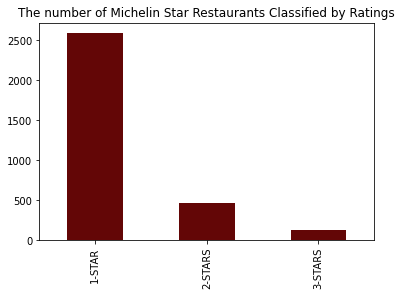

In [280]:
award.plot(kind='bar', color='#630606', title = 'The number of Michelin Star Restaurants Classified by Ratings')

In [281]:
#2. Which country has the most Michelin Star Restaurants in the world? 
top_counties = df.groupby(['country'])['michelin_award'].count().nlargest(5)
print(top_counties)

country
France     618
Japan      406
Italy      375
Germany    231
Spain      228
Name: michelin_award, dtype: int64


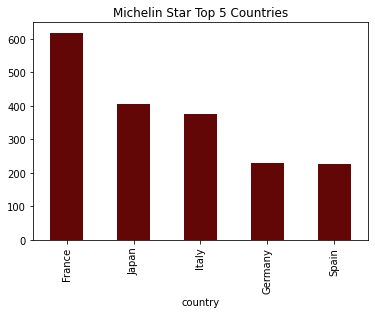

In [282]:
top_counties.plot(kind = 'bar', color = '#630606', title = 'Michelin Star Top 5 Countries')


In [283]:
#3. Which city has the most Michelin Star Restaurants in the world? (1-star/2-stars/3-stars)
top_cities = df.groupby(['city'])['michelin_award'].count().nlargest(5)
print(top_cities)


city
Tokyo        203
Kyoto        108
Paris        108
Osaka         95
Hong Kong     71
Name: michelin_award, dtype: int64


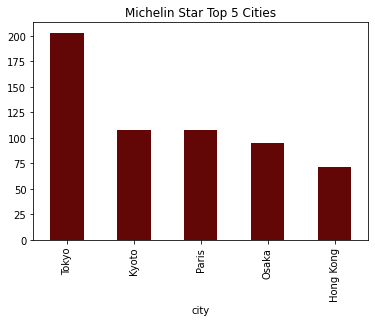

In [284]:
top_cities.plot(kind = 'bar', color = '#630606', title = 'Michelin Star Top 5 Cities')

In [285]:
#4. What is the most common cuisine Michelin star resaturants have? 
top5cuisine = df.cuisine1.value_counts().reset_index().rename(columns={'index': 'cuisine_kind', 
                                                                            'cuisine1': 'count'}
                                                                            ).head(5).set_index('cuisine_kind')
print(top5cuisine)

                count
cuisine_kind         
Modern Cuisine    874
Creative          640
Japanese          263
Contemporary      118
French            110


In [286]:
#Translate in to percentage
pct_top_cuisines = round(top10cuisine['count'] * (100) / df['name'].count())
print(pct_top_cuisines)

cuisine_kind
Modern Cuisine    27.0
Creative          20.0
Japanese           8.0
Contemporary       4.0
French             3.0
Name: count, dtype: float64


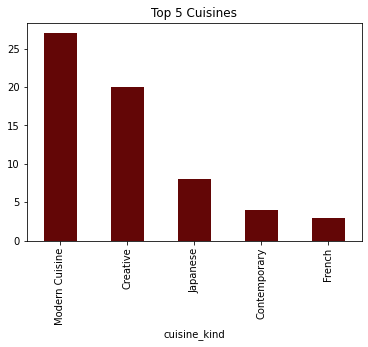

In [287]:
pct_top_cuisines.plot(kind = 'bar', color = '#630606', title = 'Top 5 Cuisines')